In [58]:
import os
import glob
import json
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')

## Importing the data

In [59]:
# Setting the directory path where the CSV files are located
directory_path = r'/Users/gokul/My Apple/vs_code_practice/resale_price_project/data'

# Concatenate all CSV files in the directory into a single DataFrame

df = pd.concat([pd.read_csv(file) for file in glob.glob(os.path.join(directory_path, '*.csv'))], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
914789,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000.0,NaN
914790,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000.0,NaN
914791,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000.0,NaN
914792,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000.0,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914794 entries, 0 to 914793
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914794 non-null  object 
 1   town                 914794 non-null  object 
 2   flat_type            914794 non-null  object 
 3   block                914794 non-null  object 
 4   street_name          914794 non-null  object 
 5   storey_range         914794 non-null  object 
 6   floor_area_sqm       914794 non-null  float64
 7   flat_model           914794 non-null  object 
 8   lease_commence_date  914794 non-null  int64  
 9   resale_price         914794 non-null  float64
 10  remaining_lease      205744 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.8+ MB


## Pre processing

In [61]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [62]:
df.nunique()

month                   408
town                     27
flat_type                 8
block                  2697
street_name             584
storey_range             25
floor_area_sqm          210
flat_model               34
lease_commence_date      56
resale_price           9344
remaining_lease         720
dtype: int64

In [63]:
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM',
       'MULTI-GENERATION', '1 ROOM', 'MULTI GENERATION'], dtype=object)

In [64]:
df['flat_type'].value_counts()

flat_type
4 ROOM              347035
3 ROOM              292946
5 ROOM              192608
EXECUTIVE            68898
2 ROOM               11468
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       260
Name: count, dtype: int64

In [65]:
# Mapping flat type values to 'MULTI GENERATION' if it is 'MULTI-GENERATION' and update the 'flat_type' column in the dataframe.

flat_type_mappings ={Type : 'MULTI GENERATION' if Type == 'MULTI-GENERATION'  else Type  for Type in df['flat_type']}

df['flat_type'] = df['flat_type'].map(flat_type_mappings)
df['flat_type'].value_counts()

flat_type
4 ROOM              347035
3 ROOM              292946
5 ROOM              192608
EXECUTIVE            68898
2 ROOM               11468
1 ROOM                1300
MULTI GENERATION       539
Name: count, dtype: int64

In [66]:
print(df['flat_model'].unique())
df['flat_model'].nunique()

['Improved' 'New Generation' 'Model A' 'Standard' 'Apartment' 'Simplified'
 'Model A-Maisonette' 'Maisonette' 'Multi Generation' 'Adjoined flat'
 'Premium Apartment' 'Terrace' 'Improved-Maisonette' 'Premium Maisonette'
 '2-room' 'Model A2' 'Type S1' 'Type S2' 'DBSS' 'Premium Apartment Loft'
 '3Gen' 'IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT']


34

In [67]:
# converting all types to upper-case, so that same types will be mapped under same name

# Create a mapping to convert each flat model to its uppercase equivalent
flat_model_mappings = {model : model.upper()  for model in df['flat_model']}

df['flat_model'] = df['flat_model'].map(flat_model_mappings)

df['flat_model'].nunique()

21

In [68]:
#converting month column to date time format

df['month'] = pd.to_datetime(df['month'], format = '%Y-%m').dt.to_period('M')

In [69]:
# splitting month and year to separate columns

df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

In [70]:
# Splitting the minimum and maximum storey from 'storey_range' and converting it to integer

df['minimum_storey']=df['storey_range'].str.split(' TO ').str[0].astype(int)
df['maximum_storey']=df['storey_range'].str.split(' TO ').str[1].astype(int)
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey
0,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,IMPROVED,1986,147000.0,NaN,2000,7,9
1,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,IMPROVED,1986,144000.0,NaN,2000,4,6
2,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,159000.0,NaN,2000,7,9
3,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,167000.0,NaN,2000,7,9
4,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,NEW GENERATION,1976,163000.0,NaN,2000,7,9


In [71]:
# mentioning remaining_lease nan values with 0 and true values with 1 in separate column

df['is_remaining_lease'] = np.where(df['remaining_lease'].isna() == True, 0, 1)

In [72]:
# remaining lease has large set of null values, so replacing them with Not specified
 
df['remaining_lease'].fillna('Not Specified', inplace = True)

In [73]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
minimum_storey         0
maximum_storey         0
is_remaining_lease     0
dtype: int64

In [74]:
df.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
year                     int64
minimum_storey           int64
maximum_storey           int64
is_remaining_lease       int64
dtype: object

In [75]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey,is_remaining_lease
0,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,IMPROVED,1986,147000.0,Not Specified,2000,7,9,0
1,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,IMPROVED,1986,144000.0,Not Specified,2000,4,6,0
2,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,159000.0,Not Specified,2000,7,9,0
3,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,167000.0,Not Specified,2000,7,9,0
4,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,NEW GENERATION,1976,163000.0,Not Specified,2000,7,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914789,12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000.0,Not Specified,1999,10,12,0
914790,12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000.0,Not Specified,1999,1,3,0
914791,12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000.0,Not Specified,1999,7,9,0
914792,12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000.0,Not Specified,1999,4,6,0


## Skewness Handling

In [76]:
def skew_plot(df, *column):
    nrow = len(column)
    plot_no = 0
    for col_name in column:
        if  'sqrt' in col_name:
            title = "After Treatment"
        else:
            title = "Before Treatment"

        plt.figure(figsize=(16, 8))

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.boxplot(x = col_name, data=df)
        plt.title('Boxplot - '+ title)

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.distplot(df[col_name])
        plt.title(f'Distplot - Skewness: {skew(df[col_name])}')

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.violinplot(x = col_name, data = df)
        plt.title('Violinplot - ' + title)

    plt.tight_layout()
    
    return plt.show()

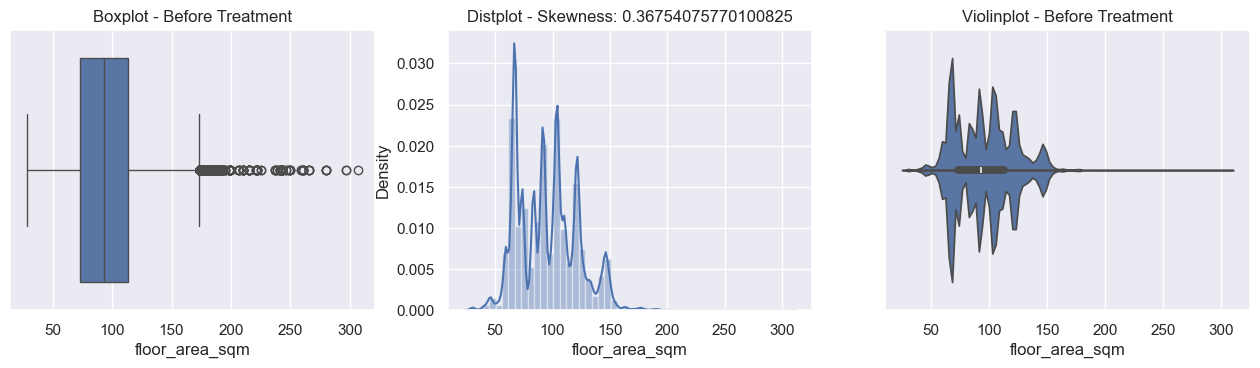

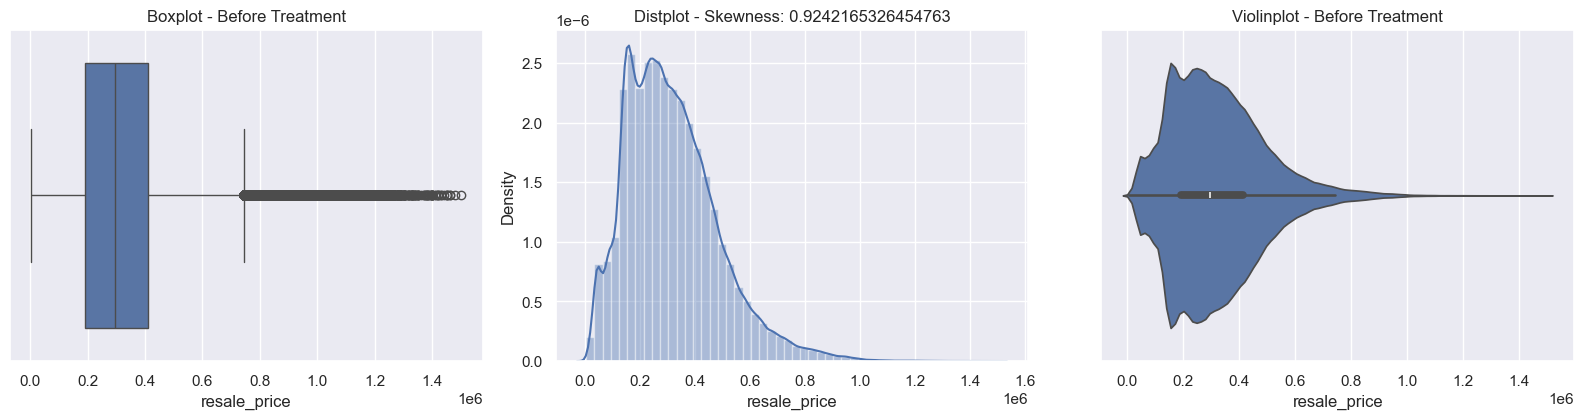

In [77]:
columns = ['floor_area_sqm', 'resale_price']
skew_plot(df, *columns)

In [78]:
# floor area and resale proce skewed
#using the sqrt transformation to distribute the data

df['floor_area_sqm_sqrt'] = np.sqrt(df['floor_area_sqm'])
df['resale_price_sqrt'] = np.sqrt(df['resale_price'])

df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey,is_remaining_lease,floor_area_sqm_sqrt,resale_price_sqrt
0,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,IMPROVED,1986,147000.0,Not Specified,2000,7,9,0,8.306624,383.405790
1,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,IMPROVED,1986,144000.0,Not Specified,2000,4,6,0,7.810250,379.473319
2,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,159000.0,Not Specified,2000,7,9,0,8.544004,398.748041


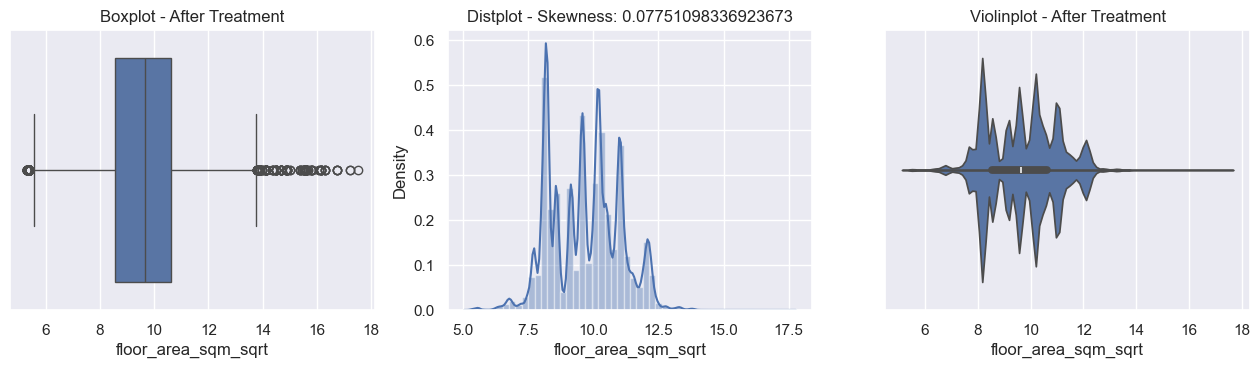

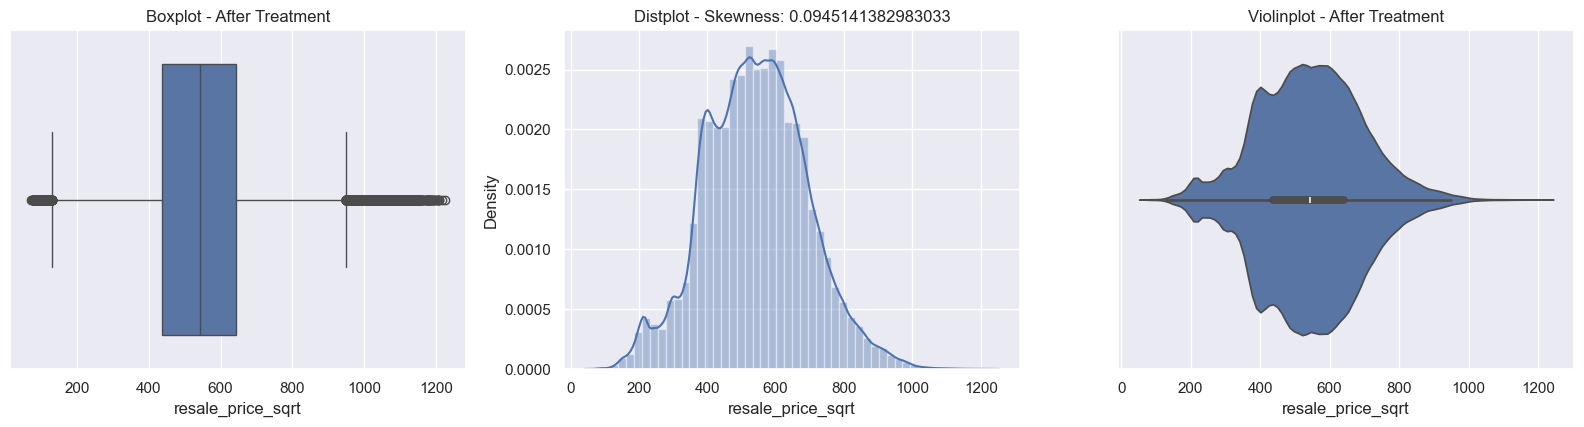

In [79]:
columns_1 = ['floor_area_sqm_sqrt', 'resale_price_sqrt']
skew_plot(df, *columns_1)

Skewness has been reduced after square root transformation

## Outliers Handling

We can see the outliers in both columns from the above plots

In [80]:
def outlier_plot(df):

    plt.figure(figsize = (16, 10))

    plt.subplot(2, 2, 1)
    sns.boxplot(x = 'floor_area_sqm_sqrt', data = df)
    plt.title('Boxplot - floor area sqm sqrt')

    plt.subplot(2, 2, 2)
    sns.boxplot(x = 'resale_price_sqrt', data = df)
    plt.title('Boxplot - '+ 'resale price sqrt')
    plt.tight_layout()
    
    return plt.show()

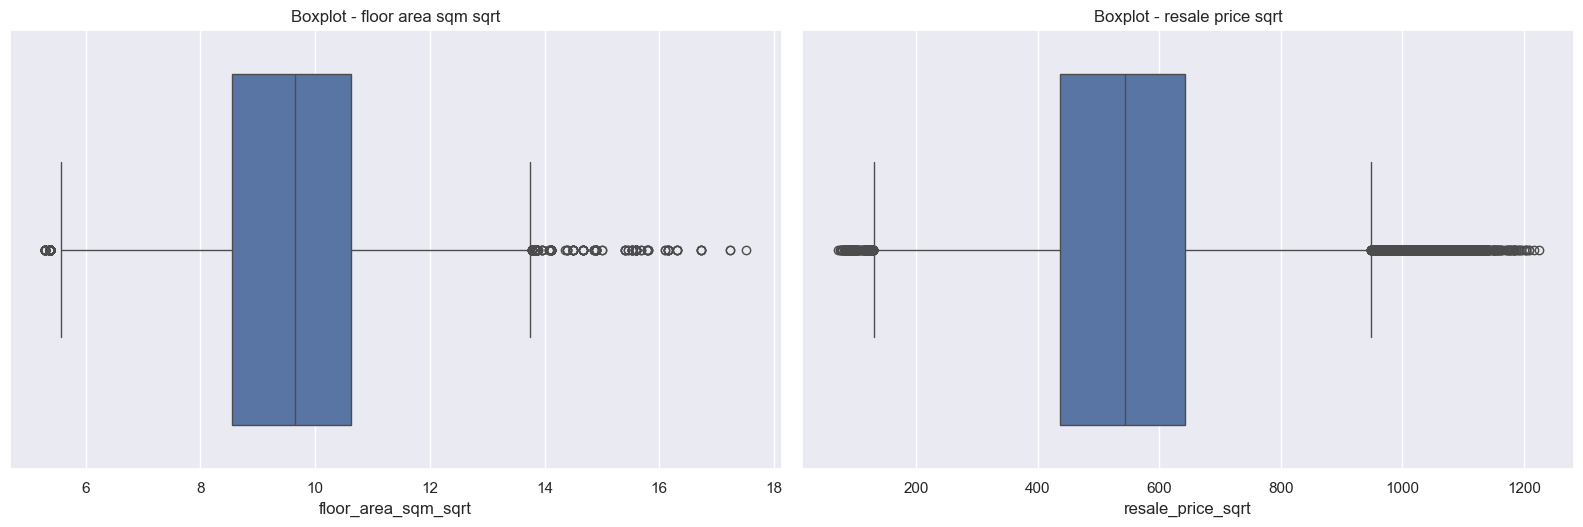

In [81]:
outlier_plot(df)

In [82]:
def treat_outliers(column):
  for i in column:
    iqr = np.percentile(df[i],75) - np.percentile(df[i],25)  # Q3 - Q1

    lower_bound =  np.percentile(df[i],25) - (1.5 * iqr)
    upper_bound = np.percentile(df[i],75) + (1.5 * iqr)
    
    df[i] = df[i].clip(lower_bound,upper_bound)
  print('Done !!!!')

treat_outliers(['floor_area_sqm_sqrt', 'resale_price_sqrt'])

Done !!!!


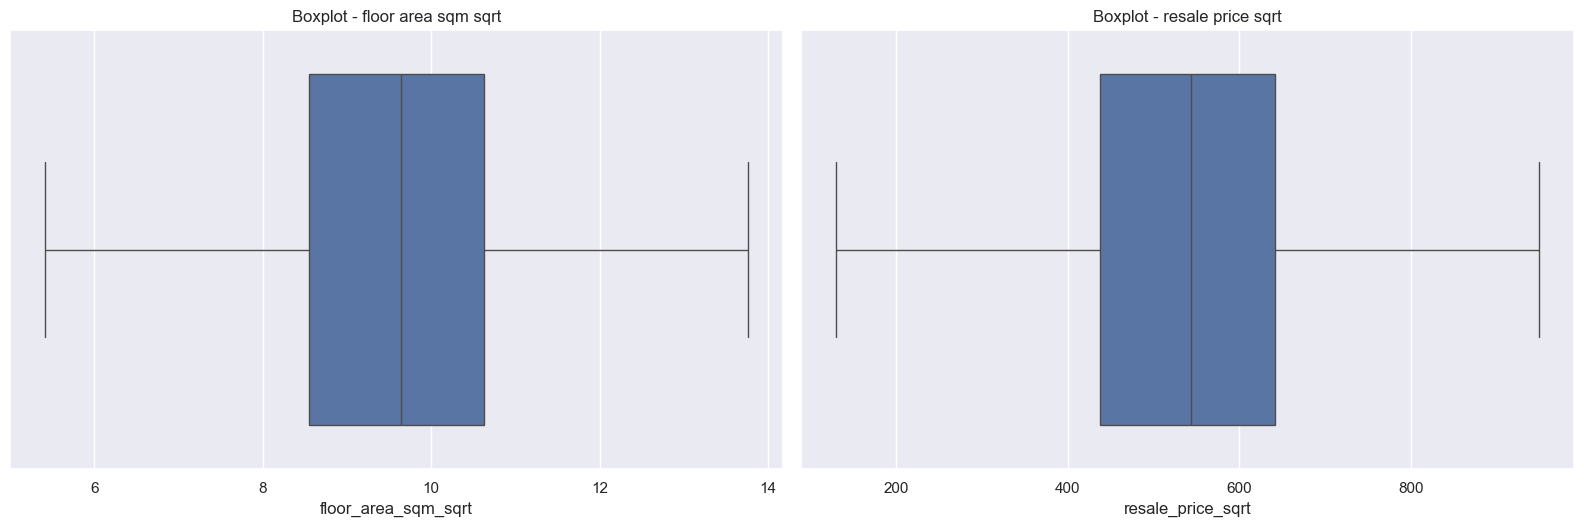

In [83]:
outlier_plot(df)

Outliers has been handled, and data distributed normally

In [84]:
#dropping the old columns of floor_area_sqm, 'resale_price

df1 = df.drop(columns= ['floor_area_sqm', 'resale_price'])
df1.head(5)

,month,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,year,minimum_storey,maximum_storey,is_remaining_lease,floor_area_sqm_sqrt,resale_price_sqrt
0,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,IMPROVED,1986,Not Specified,2000,7,9,0,8.306624,383.405790
1,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,IMPROVED,1986,Not Specified,2000,4,6,0,7.810250,379.473319
2,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,NEW GENERATION,1976,Not Specified,2000,7,9,0,8.544004,398.748041
3,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,NEW GENERATION,1976,Not Specified,2000,7,9,0,8.544004,408.656335
4,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,NEW GENERATION,1976,Not Specified,2000,7,9,0,8.185353,403.732585


<Axes: >

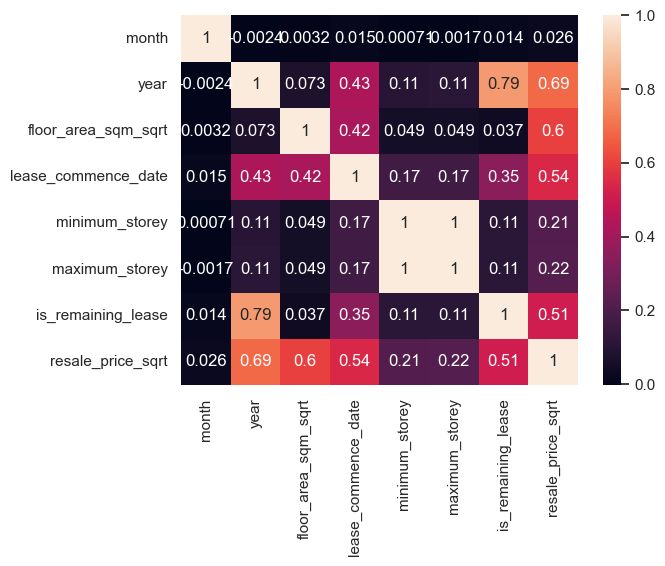

In [86]:
# checking columns correlation using heatmap

col = ['month', 'year', 'floor_area_sqm_sqrt', 'lease_commence_date', 'minimum_storey','maximum_storey',
       'is_remaining_lease', 'resale_price_sqrt']
heatmap = df1[col].corr()
sns.heatmap(heatmap, annot = True)

## Regression

### Encoding the data

In [87]:
df2 = df1.copy()

df2['remaining_lease'] = df2['remaining_lease'].astype(str)
df2

,month,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,year,minimum_storey,maximum_storey,is_remaining_lease,floor_area_sqm_sqrt,resale_price_sqrt
0,1,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,IMPROVED,1986,Not Specified,2000,7,9,0,8.306624,383.405790
1,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,IMPROVED,1986,Not Specified,2000,4,6,0,7.810250,379.473319
2,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,NEW GENERATION,1976,Not Specified,2000,7,9,0,8.544004,398.748041
3,1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,NEW GENERATION,1976,Not Specified,2000,7,9,0,8.544004,408.656335
4,1,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,NEW GENERATION,1976,Not Specified,2000,7,9,0,8.185353,403.732585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914789,12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,APARTMENT,1987,Not Specified,1999,10,12,0,11.916375,675.277721
914790,12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,APARTMENT,1988,Not Specified,1999,1,3,0,11.916375,638.748777
914791,12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,MAISONETTE,1988,Not Specified,1999,7,9,0,12.083046,684.835747
914792,12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,MAISONETTE,1988,Not Specified,1999,4,6,0,12.083046,663.324958


In [88]:
df2.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
flat_model              object
lease_commence_date      int64
remaining_lease         object
year                     int64
minimum_storey           int64
maximum_storey           int64
is_remaining_lease       int64
floor_area_sqm_sqrt    float64
resale_price_sqrt      float64
dtype: object

In [89]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

# Specify categorical column names for ordinal encoding
column_names = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'remaining_lease']

# Dictionary to store unique values before and after ordinal encoding
unique_value = {}

for col_name in column_names:
    data = df2[col_name].unique()
    data.sort()

    df2[col_name] = enc.fit_transform(df2[[col_name]])

    globals()[col_name] = {}

    for i in df2[col_name].unique():
        globals()[col_name][data[int(i)]] = i
        unique_value[f'{col_name}'] = globals()[col_name]
    # print(globals()[col_name])

In [93]:
# print(globals()[col_name])

In [92]:
# unique_value

In [94]:
# saving the encoded data into json for later use

with open ('category_encoded_data.json', 'w') as file:
    json.dump(unique_value, file, indent = 4)

In [95]:
df2.dtypes

month                    int64
town                   float64
flat_type              float64
block                  float64
street_name            float64
storey_range           float64
flat_model             float64
lease_commence_date      int64
remaining_lease        float64
year                     int64
minimum_storey           int64
maximum_storey           int64
is_remaining_lease       int64
floor_area_sqm_sqrt    float64
resale_price_sqrt      float64
dtype: object

### Model Build

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [96]:
# assigning the test variables

y = df2['resale_price_sqrt']
x = df2.drop(['resale_price_sqrt'], axis =1)

In [98]:
# Splitting the data for train test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(731835, 14) (182959, 14) (731835,) (182959,)


In [101]:
# Comparing the metrics for alll of the models

models = [('XGB Regressor', XGBRegressor()),
          ('Decision Tree Regressor', DecisionTreeRegressor()),
          ('AdaBoost Regressor' ,AdaBoostRegressor()),
          ('Extra Trees  Regressor', ExtraTreesRegressor()),
          ('Random Forest Regressor', RandomForestRegressor()),
          ('Gradient Boosting Regressor', GradientBoostingRegressor()),
          ('Linear Regression', LinearRegression())
          ]

result = []

def ml_regression():

    for model_name, model in models:

        model.fit(x_train, y_train)
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        metrics = {'Model name': model_name,
                   'Train_mse': mean_squared_error(y_train, y_train_pred),
                   'Test_mse': mean_squared_error(y_test, y_test_pred),
                   'Train_mae': mean_absolute_error(y_train, y_train_pred),
                   'Test_mae': mean_absolute_error(y_test, y_test_pred),
                   'Train_R2_score': r2_score(y_train, y_train_pred),
                   'Test_R2_score': r2_score(y_test, y_test_pred)}
        result.append(metrics)

    score_df = pd.DataFrame(result) 

    return(score_df)

In [102]:
ml_regression()

,Model name,Train_mse,Test_mse,Train_mae,Test_mae,Train_R2_score,Test_R2_score
0,XGB Regressor,394.435995,400.167132,14.867290,14.958021,0.982135,0.981875
1,Decision Tree Regressor,4.291719,617.988672,0.322667,17.394967,0.999806,0.972009
2,AdaBoost Regressor,3969.734443,3987.379166,50.662452,50.778036,0.820203,0.819394
3,Extra Trees Regressor,4.291757,374.098877,0.322718,13.877672,0.999806,0.983055
4,Random Forest Regressor,49.353964,328.127818,4.949336,12.958209,0.997765,0.985138
5,Gradient Boosting Regressor,1454.602458,1459.023265,28.166673,28.251179,0.934118,0.933914
6,Linear Regression,4323.674017,4315.807838,51.720090,51.737173,0.804172,0.804518


By seeing the above results, we can clearly say that the Random forest regressor has lowest Test MAE, MSE and High R2 score.

So choosing Random Forest regeressor for further tuning because it has good interpretability

In [111]:
# Searching for Hyper parameter - XGB regressor

from sklearn.model_selection import train_test_split, GridSearchCV

y = df2['resale_price_sqrt']
x = df2.drop(['resale_price_sqrt'], axis =1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
    }

grid_search_reg = GridSearchCV(estimator = XGBRegressor(), param_grid = param_grid, cv = 3)
grid_result = grid_search_reg.fit(x_train, y_train)

grid_result

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...ne,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [112]:
# best parameters from grid search

print(grid_result.best_params_) 
grid_result.best_score_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


0.9751940569307752

In [113]:
# XGB Regressor with Hyperparameter

xgb_model = XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 200)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

metrics_reg = {'R2': r2_test,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

metrics_reg

{'R2': 0.975452888109897,
 'Mean Absolute Error': 17.360867145867537,
 'Mean Squared Error': 541.9456459196782,
 'Root Mean Squared Error': 23.27972607054641}

In [116]:
# Searching for Hyper parameter - Decision Tree regressor

from sklearn.model_selection import train_test_split, GridSearchCV

y = df2['resale_price_sqrt']
x = df2.drop(['resale_price_sqrt'], axis =1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

grid_search_reg = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = param_grid, cv = 3)
grid_result = grid_search_reg.fit(x_train, y_train)

grid_result

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [117]:
# best parameters from grid search

print(grid_result.best_params_) 
grid_result.best_score_

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


0.9752946924276386

In [118]:
# DecisionTreeRegressor with Hyperparameter

dt_model = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 4, min_samples_split = 10)
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

metrics_reg = {'R2': r2_test,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

metrics_reg

{'R2': 0.9781468481176917,
 'Mean Absolute Error': 15.428874014818666,
 'Mean Squared Error': 482.468999418765,
 'Root Mean Squared Error': 21.965176972170404}

Metrics of XGB Regressor:

{'R2': 0.975452888109897,
 'Mean Absolute Error': 17.360867145867537,
 'Mean Squared Error': 541.9456459196782,
 'Root Mean Squared Error': 23.27972607054641}

 Comparing the values, Decision Tree model has good score, hence it will be more accurate

In [ ]:
# column_name = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'lease_commence_date',
#                 'remaining_lease', 'year', 'minimum_storey', 'maximum_storey', 'is_remaining_lease', 'floor_area_sqm_sqrt', ]

In [122]:
# Resale Price prediction using the model

data = np.array([[11, 1.0,4.0, 286.0, 39, 4.0, 5.0, 2006.0, 719, 2009.0, 7.0, 9.0, 0.0, 10.488]])
print('DecisionTreeRegressor -> Resale Price : $', dt_model.predict(data)[0]**2)
# print('XGBRegressor -> Resale Price : $', xgb_model.predict(data)[0]**2)

DecisionTreeRegressor -> Resale Price : $ 498435.9418465815


In [123]:
# saving the Decision Tree Regression model by using pickle

import pickle

with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

In [124]:
# load the pickle model to predict selling price

with open('/Users/gokul/My Apple/vs_code_practice/resale_price_project/decision_tree_model.pkl', 'rb') as file:
    reg_model = pickle.load(file)

In [125]:
# Predicting the resale price using the loaded model

data = np.array([[11, 1.0,4.0, 286.0, 39, 4.0, 5.0, 2006.0, 719, 2009.0, 7.0, 9.0, 0.0, 10.488]])

print('Resale Price : $', reg_model.predict(data)[0]**2)

Resale Price : $ 498435.9418465815
